# **CLUSTERING COUNTRIES** 

The following dataset has been provided by the 'HELP Orgainization'(an international humanitarian NGO) which contains all the <b>Socio-Economic</b> and <b>Health Standards</b> information of all the countries in the world. 
<br><br>
'Country-data.csv' has features like country , exports , imports , health , gdpp, life expectancy and many more.
<br>'data-dictionary.csv' files contains the description of the dataset.

#### MAIN OBJECTIVE : Our primary goal is to develop a model that helps in clustering of countries using the socio-economic and health standards, so as to easily classify countries with respect to their development and which countries need help.

The overview of the steps to perform: 
<br> 1) Data Visualization
<br> 2) Data Cleaning A) Eliminate NA/Null Data Records B) Feature Engineering .
<br> 3) Tranforming and Scaling of Data
<br> 4) Run Unsupervised Models
<br> 5) Optimize the best model
<br> 6) Predict Results and Best Model
<br> 7) Conclusions
<br>

## **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np 
import os , seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
# sns.set_palette(palette)

#  WARNINGS
import warnings
warnings.filterwarnings("ignore" , category=RuntimeWarning)
warnings.filterwarnings("ignore" , category=UserWarning)


## **DATA**

In [ ]:
#  Dataset
filepath = 'Country-data.csv'
data = pd.read_csv(filepath)

In [ ]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
data.shape

(167, 10)

The dataset has 10 features and 167 data records(countries).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
print('No. of Float Data types   : ' ,(data.dtypes == 'float64').sum())
print('No. of Object Data types  : ' ,(data.dtypes == 'object').sum())
print('No. of Integer Data types : ' ,(data.dtypes == 'int64').sum())

No. of Float Data types   :  7
No. of Object Data types  :  1
No. of Integer Data types :  2


<br>

In [ ]:
# DATA INFO and DISTRIBUTION
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Since the avg mean of the features have very large difference thus we need to scale the data. Also, features like 'child_mort', 'imports' , 'exports' , 'income' , 'gdpp' and 'inflation' have a significant rise in value after 75% percentile and max that signifies that these are right skewed. We need to transform these features first.
<br> 'country' is a Categorical Feature and needs to be encoded.

### CHECK NULL VALUE

In [ ]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There's no Null values in the dataset. So we can move forward to Data Visualization.

## **DATA VISUALIZATION**

In [ ]:
# colors = ['#DB1C18','#DBDB3B','#51A2DB']
# sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
country = data.country
numerical_cols = data.select_dtypes(exclude='object').columns
data2 = data[numerical_cols]
data2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


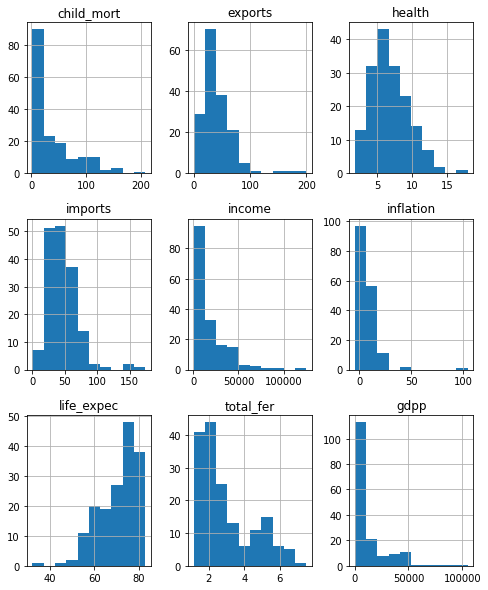

In [ ]:
# DATA DISTRIBUTION - HISTOGRAM 
data2.hist(figsize=(8, 10))
plt.show()

As infered earlier features like 'child_mort', 'imports' , 'exports' , 'income' , 'gdpp' and 'inflation' heavily right skewed and need to be transformed.

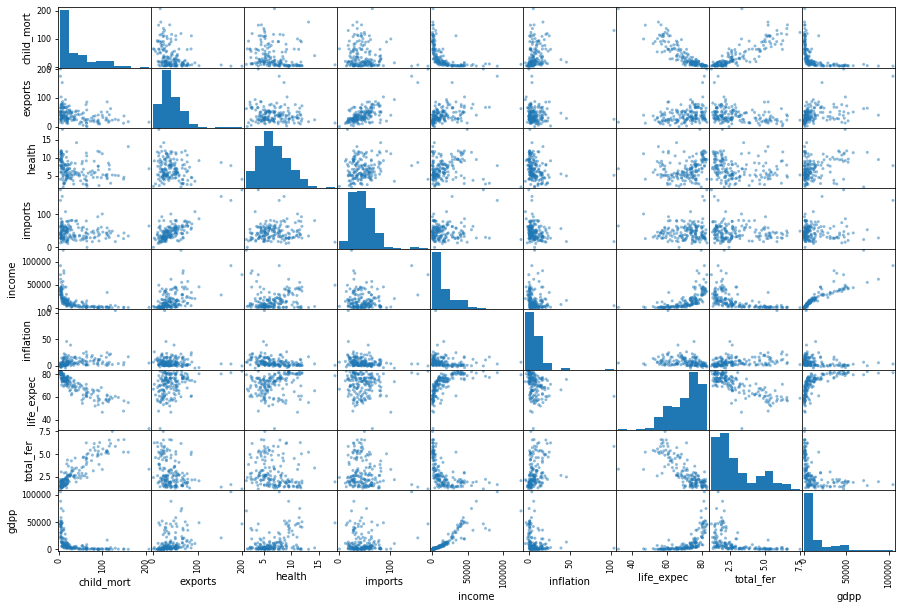

In [ ]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data , diagonal='hist' ,figsize=(15,10) )
plt.show()

From the graph it is visible there are two cluster formation. 
<br>Some observation : 
1) Child_mort, total_fer have negative correlation with gdpp. <br>
2) Income has positive correlation with gdpp.<br>
3) Child_mort and total_fer have a clear positive correlation.<br>


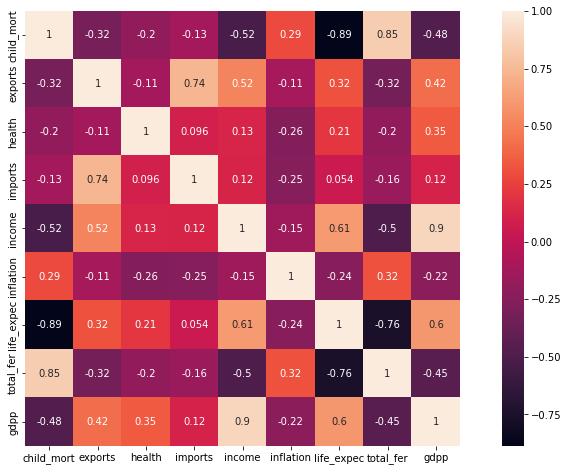

In [ ]:
# HEATMAP
fig=plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, square=True )

## **DATA TRANSFORM**

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
df_scaled = MinMaxScaler().fit_transform(data.drop(['country'], axis=1))

In [ ]:
df_scaled = pd.DataFrame(df_scaled , columns=numerical_cols)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


## **DATA MODELING**

Using PCA dimensional analysis to reduce dimensionality.

In [ ]:
#  PCA 
from sklearn.decomposition import PCA

PCA_model = PCA(svd_solver='auto')
PCA_model.fit(df_scaled)
df_scaled_pca = PCA_model.transform(df_scaled)



The EXPLAINED VARIANCE RATIO OF AXIS : 
 [0.55   0.1338 0.123  0.0975 0.0378 0.0301 0.0119 0.0089 0.0069]


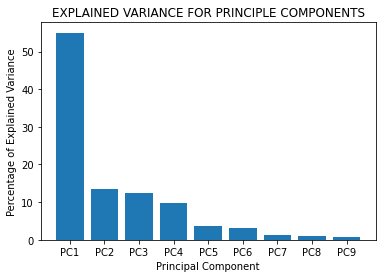

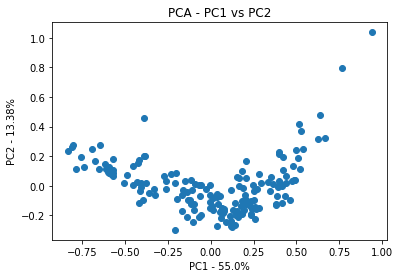

In [ ]:
# percentage variation 
exp_variance = np.round(PCA_model.explained_variance_ratio_*100, decimals =2)
labels = ['PC' + str(x) for x in range (1, len(exp_variance)+1)]
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns = labels)

print('\nThe EXPLAINED VARIANCE RATIO OF AXIS : \n',exp_variance/100)

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(exp_variance)+1), height=exp_variance, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('EXPLAINED VARIANCE FOR PRINCIPLE COMPONENTS')
plt.show()

# plot pca
plt.scatter(df_scaled_pca.PC1, df_scaled_pca.PC2)
plt.title('PCA - PC1 vs PC2')
plt.xlabel('PC1 - {0}%'.format(exp_variance[0]))
plt.ylabel('PC2 - {0}%'.format(exp_variance[1]))
plt.show()

Text(0, 0.5, 'Explained Variance Ratio')

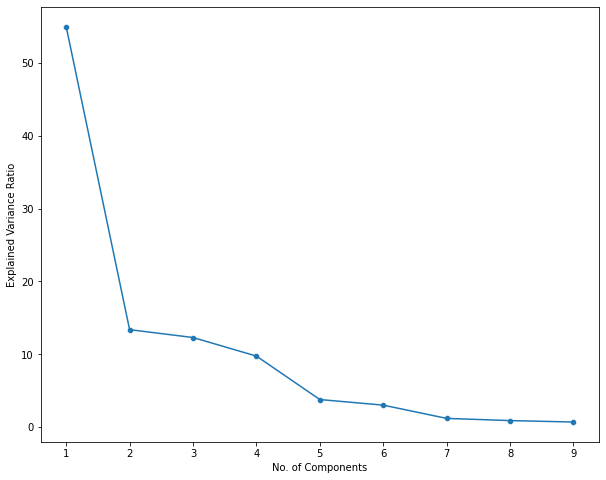

In [ ]:
# PLOT 
fig = plt.figure(figsize=(10,8))
ax = sns.lineplot(y=exp_variance , x=np.arange(1, len(exp_variance)+1))
ax = sns.scatterplot(y=exp_variance , x=np.arange(1, len(exp_variance)+1))
ax.set_xlabel('No. of Components')
ax.set_ylabel('Explained Variance Ratio')

So, from the graph it is pretty evident that the Explained Variance deviation is not much between 3 to 5 and negligible after 5. Thus, we would be considering clusters of 3,4 and 5 in our model and check for the best results. Since PC5, PC6, PC7, PC8, PC9 have significantly low variance, we drop those. 

In [ ]:
df_scaled_pca.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1, inplace=True)
df_scaled_pca

,PC1,PC2,PC3,PC4
0,-0.599078,0.095490,0.157554,-0.024333
1,0.158474,-0.212092,-0.064189,-0.061247
2,0.003686,-0.135867,-0.134182,0.133574
3,-0.650235,0.275975,-0.142672,0.156018
4,0.200711,-0.064662,-0.100715,-0.037902
...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099
163,0.061133,-0.171339,-0.058586,0.247460
164,0.115512,-0.032034,-0.195243,-0.231993
165,-0.332968,-0.019824,-0.029989,0.105416


## **1) HIERARCHIAL CLUSTER**

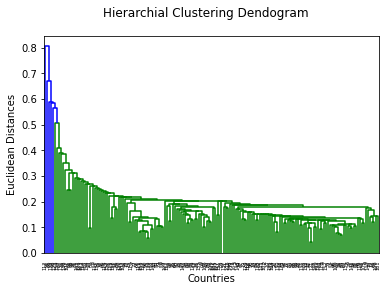

In [ ]:
from scipy.cluster import hierarchy
Z= hierarchy.linkage(df_scaled , method='single')
dendogram = hierarchy.dendrogram(Z)
plt.suptitle('Hierarchial Clustering Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

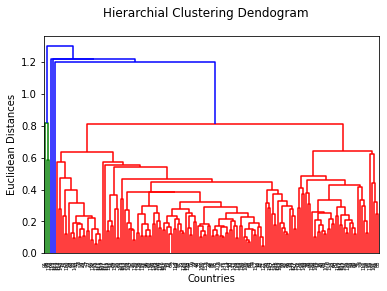

In [ ]:
from scipy.cluster import hierarchy
Z= hierarchy.linkage(df_scaled , method='average')
dendogram = hierarchy.dendrogram(Z)
plt.suptitle('Hierarchial Clustering Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

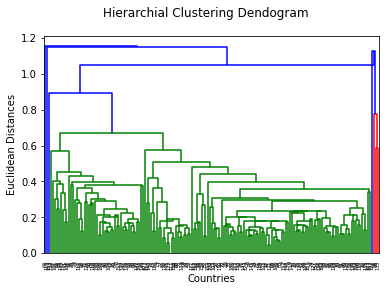

In [ ]:
from scipy.cluster import hierarchy
Z= hierarchy.linkage(df_scaled , method='centroid')
dendogram = hierarchy.dendrogram(Z)
plt.suptitle('Hierarchial Clustering Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

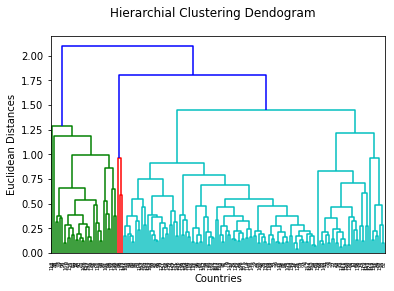

In [ ]:
from scipy.cluster import hierarchy
Z= hierarchy.linkage(df_scaled , method='complete')
dendogram = hierarchy.dendrogram(Z)
plt.suptitle('Hierarchial Clustering Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

## **a) AGGLOMERATIVE CLUSTERING**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

data_aglo = pd.DataFrame(data)
aglo_list = []
for k in range(2 ,6):
  aglo = AgglomerativeClustering(n_clusters=k , linkage='complete').fit(df_scaled_pca)
  if k == 3:
      agglomerative_silhouette_score = silhouette_score(df_scaled_pca,labels= aglo.labels_)
  aglo_list.append(pd.Series({
        'clusters' : k,
        'model' : aglo,
        'silhouette' : silhouette_score(df_scaled_pca,labels= aglo.labels_)
    }))
  data_aglo['AGLO'+str(k)] = aglo.labels_
agglomerative_silhouette_score

0.307841617415905

In [ ]:
aglo_results = pd.DataFrame(aglo_list)
aglo_results.set_index('clusters')

,model,silhouette
clusters,,
2,AgglomerativeClustering(linkage='complete'),0.329800
3,"AgglomerativeClustering(linkage='complete', n_...",0.307842
4,"AgglomerativeClustering(linkage='complete', n_...",0.324524
5,"AgglomerativeClustering(linkage='complete', n_...",0.315966


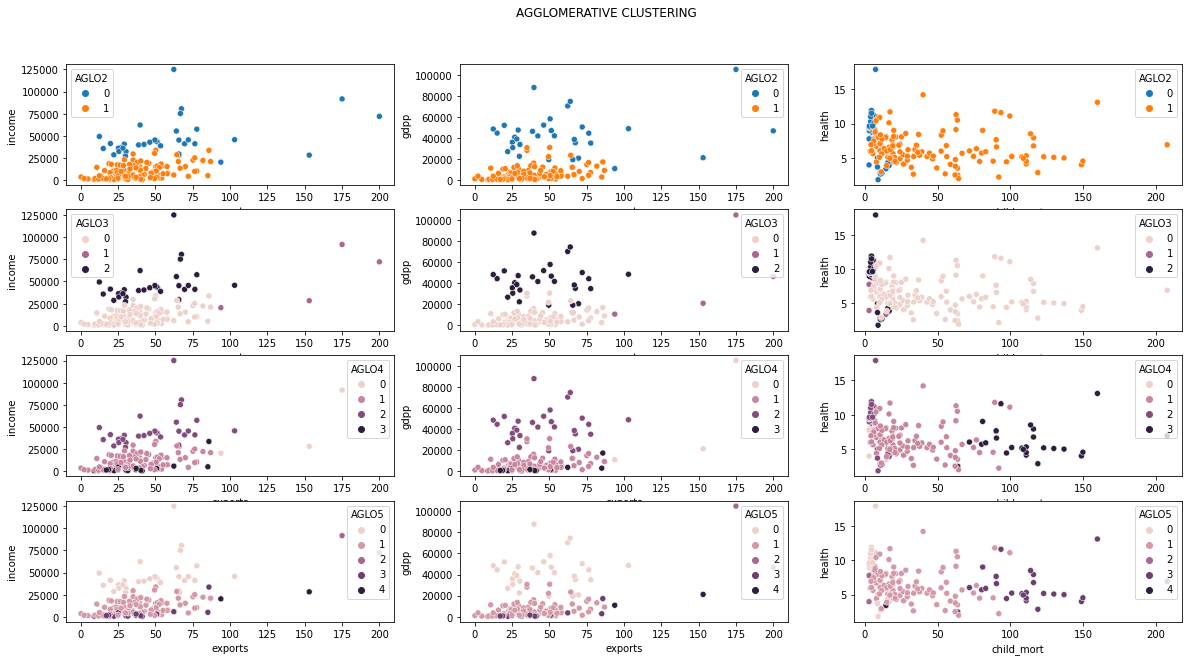

In [ ]:
fig,ax=plt.subplots(nrows=len(aglo_results),ncols=3,figsize=(20,10))

for i in range(len(aglo_results)):
  
  sns.scatterplot(data=data_aglo, x='exports', y='income',hue='AGLO'+str(i+2) , ax=ax[i][0])
  sns.scatterplot(data=data_aglo, x='exports', y='gdpp',hue='AGLO'+str(i+2), ax=ax[i][1])
  sns.scatterplot(data=data_aglo, x='child_mort', y='health', hue='AGLO'+str(i+2), ax=ax[i][2])

fig.subplots_adjust(top=0.9)
fig.suptitle("AGGLOMERATIVE CLUSTERING")

plt.show()

Best clustering observed is in N_Cluster = 3. As it has about proportional distribution of data points and the clusters are well defined. N_Cluster=2, seems to over generalised while N_Cluster=5, has a lot of overlapping between the clusters. For N_cluster=4, cluster distribution seems to be dominated by Cluster0. 

## **2) DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=10).fit(df_scaled)
data['DBSCAN_cluster'] = db.labels_
db.labels_

array([-1,  0,  0, -1,  0,  0,  0,  1,  1,  0,  0, -1,  0,  0,  0, -1,  0,
       -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0, -1,  1,  0, -1, -1,  0,
        0,  0, -1, -1, -1,  0, -1,  0, -1,  0,  1,  0,  0,  0,  0, -1, -1,
        0,  0,  1,  1, -1, -1,  0,  1, -1,  1,  0,  0, -1, -1,  0, -1,  0,
        1,  0,  0,  0, -1, -1, -1,  1,  0,  1, -1, -1, -1, -1, -1,  0, -1,
        0,  0, -1, -1, -1,  0, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0, -1,
       -1, -1,  0,  0, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1,  0,  1, -1,  0, -1,  0,  1, -1, -1, -1,  0, -1, -1, -1,  0,
        0, -1, -1,  0, -1,  1, -1,  0,  0, -1, -1,  0, -1, -1])

In [ ]:
db_nclusters = np.unique(db.labels_)
print("DBSCAN CLUSTERS FORMED : ", db_nclusters )

DBSCAN CLUSTERS FORMED :  [-1  0  1]


In [ ]:
from sklearn.metrics import silhouette_score
dbscan_silhouette_score = silhouette_score(df_scaled,labels= db.labels_)
dbscan_silhouette_score

0.1615101388962571

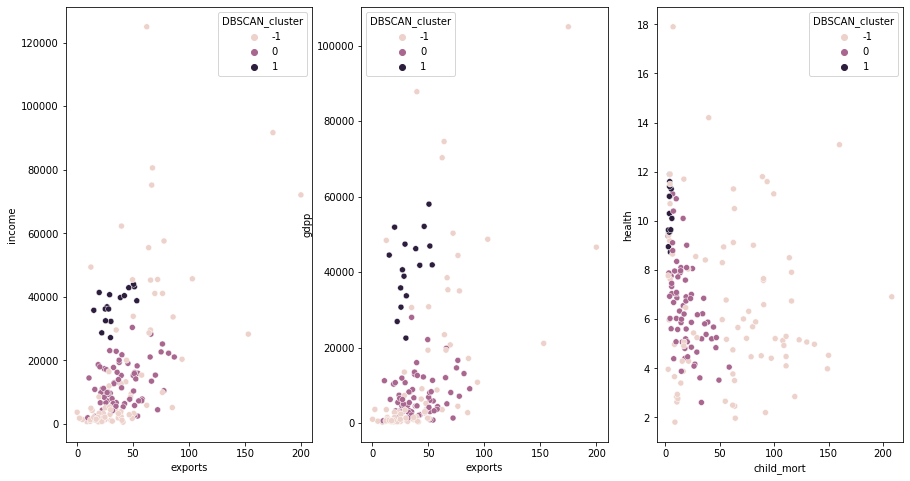

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,8))
sns.scatterplot(data=data, x='exports', y='income',hue='DBSCAN_cluster', ax=ax[0])
sns.scatterplot(data=data, x='exports', y='gdpp',hue='DBSCAN_cluster', ax=ax[1])
sns.scatterplot(data=data, x='child_mort', y='health', hue='DBSCAN_cluster', ax=ax[2])

Clusters obtained DSCAN are overlapping, as seen in Cluster -1 and Cluster 0. Also, low silhouette score verifies the cluster distribution is not properly seperable. 

## **3) K MEANS**

Running K Means in a loop for different K values from 1 to 10

In [ ]:
from sklearn.cluster import KMeans
# Store the Inertia and model object for each K
km_list = list()

for k in range(1,10):
    km = KMeans(n_clusters= k , random_state=0)
    km.fit(df_scaled_pca)
    
    km_list.append(pd.Series({
        'clusters' : k,
        'inertia' : km.inertia_,
        'model' : km
    }))
    


In [ ]:
pd.DataFrame(km_list)

,clusters,inertia,model
0,1,38.705496,"KMeans(n_clusters=1, random_state=0)"
1,2,21.858009,"KMeans(n_clusters=2, random_state=0)"
2,3,15.270489,"KMeans(n_clusters=3, random_state=0)"
3,4,12.943510,"KMeans(n_clusters=4, random_state=0)"
4,5,10.997411,"KMeans(n_clusters=5, random_state=0)"
5,6,9.770420,"KMeans(n_clusters=6, random_state=0)"
6,7,8.703461,"KMeans(n_clusters=7, random_state=0)"
7,8,7.865883,KMeans(random_state=0)
8,9,7.045918,"KMeans(n_clusters=9, random_state=0)"


<br><br><br><br>
### PLOT Distortion Elbow Curve

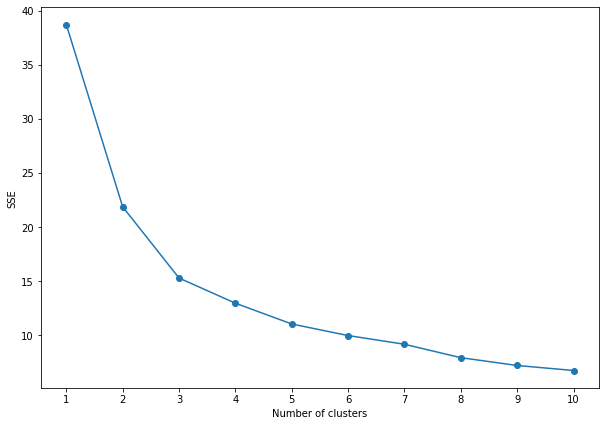

In [ ]:
sse2 = []
for i in range(1, 11):
    km2 = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km2.fit(df_scaled_pca)
    sse2.append(km2.inertia_)

# plot
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), sse2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(range(1, 11))
plt.show()

Even the <b>Elbow Method</b> for the KMeans clearly <b>supports K=3</b> as a good choice for the our KMeans model for classification of models with a distortion score(15.22). 

## **KMeans K=3**

In [ ]:
#  Final Model

model = KMeans(n_clusters=3 , random_state=1)
model.fit(df_scaled_pca)

#  Store the Cluster Index into the DataFrame
data['KMeans_cluster'] = model.labels_


In [ ]:
from sklearn.metrics import silhouette_score
kmeans_silhouette_score = silhouette_score(df_scaled_pca,labels=model.labels_)
kmeans_silhouette_score

0.3883883667096438

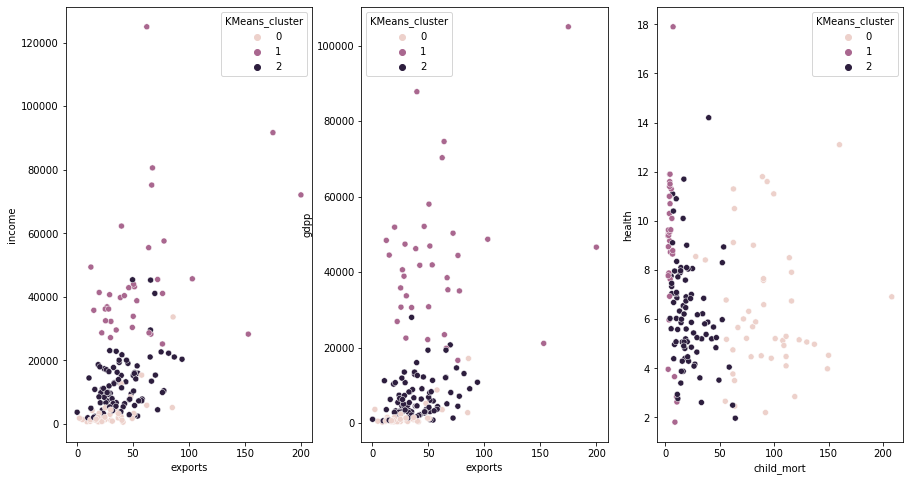

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,8))
sns.scatterplot(data=data, x='exports', y='income',hue='KMeans_cluster', ax=ax[0])
sns.scatterplot(data=data, x='exports', y='gdpp',hue='KMeans_cluster', ax=ax[1])
sns.scatterplot(data=data, x='child_mort', y='health', hue='KMeans_cluster', ax=ax[2])

## **Final Results - Clustering of our Countries**

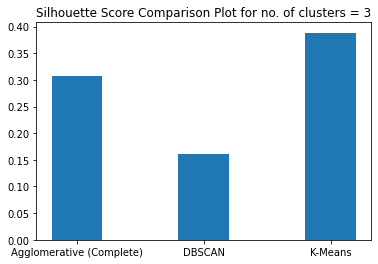

In [ ]:
x = ["Agglomerative (Complete)", "DBSCAN", "K-Means"]
y = [agglomerative_silhouette_score, dbscan_silhouette_score, kmeans_silhouette_score]
plt.title("Silhouette Score Comparison Plot for no. of clusters = 3")
plt.bar(x, y, width=0.4)
plt.show()

In [ ]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,AGLO2,AGLO3,AGLO4,AGLO5,DBSCAN_cluster,KMeans_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,3,3,-1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,1,1,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,1,1,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,3,3,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0,1,1,-1,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0,1,1,-1,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0,1,1,0,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,1,1,-1,0


### Analyze the Clusters

In [ ]:
data.groupby(['KMeans_cluster' , 'country']).mean()

child_mort  exports  health  imports   income  \
KMeans_cluster country                                                       
0              Afghanistan         90.2    10.00    7.58     44.9   1610.0   
               Angola             119.0    62.30    2.85     42.9   5900.0   
               Benin              111.0    23.80    4.10     37.2   1820.0   
               Burkina Faso       116.0    19.20    6.74     29.6   1430.0   
               Burundi             93.6     8.92   11.60     39.2    764.0   
...                                 ...      ...     ...      ...      ...   
2              Uruguay             10.6    26.30    8.35     25.4  17100.0   
               Uzbekistan          36.3    31.70    5.81     28.5   4240.0   
               Vanuatu             29.2    46.60    5.25     52.7   2950.0   
               Venezuela           17.1    28.50    4.91     17.6  16500.0   
               Vietnam             23.3    72.00    6.84     80.2   4490.0   

                             inflation  life_expec  total_fer     gdpp  AGLO2  \
KMeans_cluster country                                                          
0              Afghanistan       9.440        56.2       5.82    553.0    1.0   
               Angola           22.400        60.1       6.16   3530.0    1.0   
               Benin             0.885        61.8       5.36    758.0    1.0   
               Burkina Faso      6.810        57.9       5.87    575.0    1.0   
               Burundi          12.300        57.7       6.26    231.0    1.0   
...                                ...         ...        ...      ...    ...   
2              Uruguay           4.910        76.4       2.08  11900.0    1.0   
               Uzbekistan       16.500        68.8       2.34   1380.0    1.0   
               Vanuatu           2.620        63.0       3.50   2970.0    1.0   
               Venezuela        45.900        75.4       2.47  13500.0    1.0   
               Vietnam          12.100        73.1       1.95   1310.0    1.0   

                             AGLO3  AGLO4  AGLO5  DBSCAN_cluster  
KMeans_cluster country                                            
0              Afghanistan     0.0    3.0    3.0            -1.0  
               Angola          0.0    3.0    3.0            -1.0  
               Benin           0.0    3.0    3.0            -1.0  
               Burkina Faso    0.0    3.0    3.0            -1.0  
               Burundi         0.0    3.0    3.0            -1.0  
...                            ...    ...    ...             ...  
2              Uruguay         0.0    1.0    1.0             0.0  
               Uzbekistan      0.0    1.0    1.0             0.0  
               Vanuatu         0.0    1.0    1.0            -1.0  
               Venezuela       0.0    1.0    1.0            -1.0  
               Vietnam         0.0    1.0    1.0             0.0  

[167 rows x 14 columns]

After analyzing the above tables we have decided the labels for each cluster in our dataset as:<br>
0 : 'Needs Help', <br>
1 : 'Do not Need Help', <br>
2 : 'Might Need Help' <br>

In [ ]:
label = {0 : 'Needs Help',
         1 : 'Do not Need Help',
         2 : 'Might Need Help' 
        }

data['labels'] = data['KMeans_cluster'].map(label)

# Number of Countries in each Cluster
data['labels'].value_counts()

Might Need Help     86
Needs Help          46
Do not Need Help    35
Name: labels, dtype: int64

There are 46 countries that 'Needs Help' , 86 countries that 'Might Need Help' and 35 countries that 'Do not Need Help'.

## **PREDICTIONS**

The data has been successfully classified into 3 groups: <b>'Needs Help'</b> , <b>'Might Need Help'</b> and <b>'Do not need help'</b>.
<br><br>
Example listing all the countries need help:    

In [ ]:
data[data['labels'] == 'Needs Help']['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

In [ ]:
data[data['country'] == 'India']['labels']

69    Might Need Help
Name: labels, dtype: object

In [ ]:
data[data['country'] == 'Pakistan']['labels']

116    Needs Help
Name: labels, dtype: object

In [ ]:
data[data['country'] == 'Canada']['labels']

29    Do not Need Help
Name: labels, dtype: object

## **CONCLUSION**

We have successfully classified all the countries into <b>'Needs Help'</b> , <b>'Might Need Help'</b> and <b>'Do Not Need Help'</b>.
<br>
1. Most of the American and European Countries may not need help.<br>
2. Most of the African countries and Middle Eastern countries like Iraq, Yemen , or countries like Afghanisthan , Pakisthan require help.
<br>
3. Most of the remaining Asian Countries Might require help, lying in between the two classes.

Thus, this completes our analysis with a KMeans Model of K=3 having distortion (15.22) for classifying our Country.csv dataset.